##### Analise de inflação de países 
##### Aluno: Guilherme Fernandes
##### Curso: BootCampLLM - Soulcode
##### Tema: Analise Estatisco de inflação de países e Comparação entre eles

#### INICIO DO CÓDIGO ####

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import scipy.stats as sp
from itertools import combinations
import matplotlib.pyplot as plt 
import re

In [2]:
# Importando o dataset
df = pd.read_csv('paises_europa/tabela_paises.csv')
df.head() # Mostrando as primeiras linhas do dataset

,Mes/Ano,Alemanha,Estonia,Finlandia,Grecia,Suecia
0,Jan/2020,1.6,1.6,1.2,1.1,1.5
1,Fev/2020,1.7,2.0,1.1,0.4,1.3
2,Mar/2020,1.3,1.0,0.9,0.2,0.8
3,Abr/2020,0.8,-0.9,-0.3,-0.9,-0.2
4,Mai/2020,0.5,-1.8,-0.1,-0.7,0.1


### Comparação da inflação dos países Mes a Mes entre 2020 a 2023

In [3]:
paises_eur = df.columns[1:].tolist() # Lista de países da Europa
comparacoes_por_mes = [] # Lista para armazenar as comparações

# Remover espaços em branco e caracteres especiais e repedição de caracteres
df['Mes/Ano'] = df['Mes/Ano'].apply(lambda x: re.match(r'([A-Za-z]+/\d{4})', x).group(1) if re.match(r'([A-Za-z]+/\d{4})', x) else x)

# Iterar sobre as linhas do DataFrame
for _, row in df.iterrows():
    mes_ano = str(row['Mes/Ano']).strip()  # Garante que é uma string limpa
    comparacoes = [] # Lista para armazenar as comparações para o mês atual
    
    # Comparar os valores de cada país da Europa
    for pais_eu1, pais_eu2 in combinations(paises_eur, 2):
        valor_eu1 = row[pais_eu1]
        valor_eu2 = row[pais_eu2]
        
        # Verificar se os valores são números e se são válidos
        if valor_eu1 > valor_eu2:
            msg = f"{pais_eu1} ({valor_eu1}) > {pais_eu2} ({valor_eu2})"
        elif valor_eu2 > valor_eu1:
            msg = f"{pais_eu2} ({valor_eu2}) > {pais_eu1} ({valor_eu1})"
        else:
            msg = f"{pais_eu1} = {pais_eu2} ({valor_eu1})"
        
        # Adicionar a mensagem à lista de comparações para o mês atual
        comparacoes.append(msg)  
    
    # Adicionar as comparações para o mês atual à lista geral
    comparacoes_por_mes.append({
        'Mes/Ano': mes_ano,
        'Comparações': comparacoes
    })

# Exibir resultados corretamente
for mes in comparacoes_por_mes[:48]:  
    print(f"\n--- {mes['Mes/Ano']} ---")  
    for comp in mes['Comparações']:
        print(comp)



--- Jan/2020 ---
Alemanha = Estonia (1.6)
Alemanha (1.6) > Finlandia (1.2)
Alemanha (1.6) > Grecia (1.1)
Alemanha (1.6) > Suecia (1.5)
Estonia (1.6) > Finlandia (1.2)
Estonia (1.6) > Grecia (1.1)
Estonia (1.6) > Suecia (1.5)
Finlandia (1.2) > Grecia (1.1)
Suecia (1.5) > Finlandia (1.2)
Suecia (1.5) > Grecia (1.1)

--- Fev/2020 ---
Estonia (2.0) > Alemanha (1.7)
Alemanha (1.7) > Finlandia (1.1)
Alemanha (1.7) > Grecia (0.4)
Alemanha (1.7) > Suecia (1.3)
Estonia (2.0) > Finlandia (1.1)
Estonia (2.0) > Grecia (0.4)
Estonia (2.0) > Suecia (1.3)
Finlandia (1.1) > Grecia (0.4)
Suecia (1.3) > Finlandia (1.1)
Suecia (1.3) > Grecia (0.4)

--- Mar/2020 ---
Alemanha (1.3) > Estonia (1.0)
Alemanha (1.3) > Finlandia (0.9)
Alemanha (1.3) > Grecia (0.2)
Alemanha (1.3) > Suecia (0.8)
Estonia (1.0) > Finlandia (0.9)
Estonia (1.0) > Grecia (0.2)
Estonia (1.0) > Suecia (0.8)
Finlandia (0.9) > Grecia (0.2)
Finlandia (0.9) > Suecia (0.8)
Suecia (0.8) > Grecia (0.2)

--- Abr/2020 ---
Alemanha (0.8) > Eston

#### Gerar Graficos de comparação de inflação dos meses

### Media de inflação de 2020 a 2023 dos paises

In [4]:
# lista de paises
paises =['Alemanha', 'Estonia', 'Finlandia', 'Grecia', 'Suecia']

# criando um dicionário para armazenar as médias de inflação
medias_inflacao = {}

# calculando a média de inflação para cada país
for pais in paises:
    if pais in df.columns:
        medias_inflacao[pais]= np.mean(df[pais])
        print(f'A média de inflação do país {pais} é {medias_inflacao[pais]:.4f}')
    else:
        print(f'O país {pais} não está no dataframe')

A média de inflação do país Alemanha é 4.5812
A média de inflação do país Estonia é 8.1708
A média de inflação do país Finlandia é 3.5063
A média de inflação do país Grecia é 3.2063
A média de inflação do país Suecia é 4.3312


### Comparação de inflação de cada pais e gerando a comparação de inflação de cada pais  entre si e gerando Significancia estatistica entre os paises

In [5]:
# Extraindo od dados da coluna de países
extrato = df.columns[1:].tolist()

# Gerando todas as combinações possíveis de países
ger_pares = list(combinations(extrato, 2))

# Definindo o nível de confiança desejado
niv_confianca = float(input("Digite o nível de significativa desejado (ex: 0.95): "))


# Criando um dicionário para armazenar os resultados
for paises_eu1 , paises_eu2 in ger_pares :
        dados_paises_eu1 = df[paises_eu1]
        dados_paises_eu2 = df[paises_eu2]
    
        t_stat, p_valor = sp.stats.ttest_ind(dados_paises_eu1, dados_paises_eu2, equal_var=False)
    
        medias_eu1 = dados_paises_eu1.mean()
        medias_eu2 = dados_paises_eu2.mean()

    
        # Verificando se há diferença significativa entre as médias
        if p_valor < niv_confianca:
            diferenca_eu = "Diferença significativa entre as médias"
        else:
            diferenca_eu = "Não há diferença significativa entre as médias"
        
        
        print(f"País 1: {paises_eu1} | País 2: {paises_eu2}")
        print(f"Média dos País: {medias_eu1:.2f} vs {medias_eu2:.2f} ")
        print(f"Valor de P: {p_valor:.4f} ---> {diferenca_eu}\n")


País 1: Alemanha | País 2: Estonia
Média dos País: 4.58 vs 8.17 
Valor de P: 0.0088 ---> Diferença significativa entre as médias

País 1: Alemanha | País 2: Finlandia
Média dos País: 4.58 vs 3.51 
Valor de P: 0.1130 ---> Não há diferença significativa entre as médias

País 1: Alemanha | País 2: Grecia
Média dos País: 4.58 vs 3.21 
Valor de P: 0.0986 ---> Não há diferença significativa entre as médias

País 1: Alemanha | País 2: Suecia
Média dos País: 4.58 vs 4.33 
Valor de P: 0.7252 ---> Não há diferença significativa entre as médias

País 1: Estonia | País 2: Finlandia
Média dos País: 8.17 vs 3.51 
Valor de P: 0.0007 ---> Diferença significativa entre as médias

País 1: Estonia | País 2: Grecia
Média dos País: 8.17 vs 3.21 
Valor de P: 0.0006 ---> Diferença significativa entre as médias

País 1: Estonia | País 2: Suecia
Média dos País: 8.17 vs 4.33 
Valor de P: 0.0049 ---> Diferença significativa entre as médias

País 1: Finlandia | País 2: Grecia
Média dos País: 3.51 vs 3.21 
Valor d

/tmp/ipykernel_22013/1815360716.py:16: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_valor = sp.stats.ttest_ind(dados_paises_eu1, dados_paises_eu2, equal_var=False)


### Gerando o gráfico de Barras de inflação dos países

/tmp/ipykernel_22013/3685258577.py:21: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_valor = sp.stats.ttest_ind(dados1, dados2, equal_var=False)


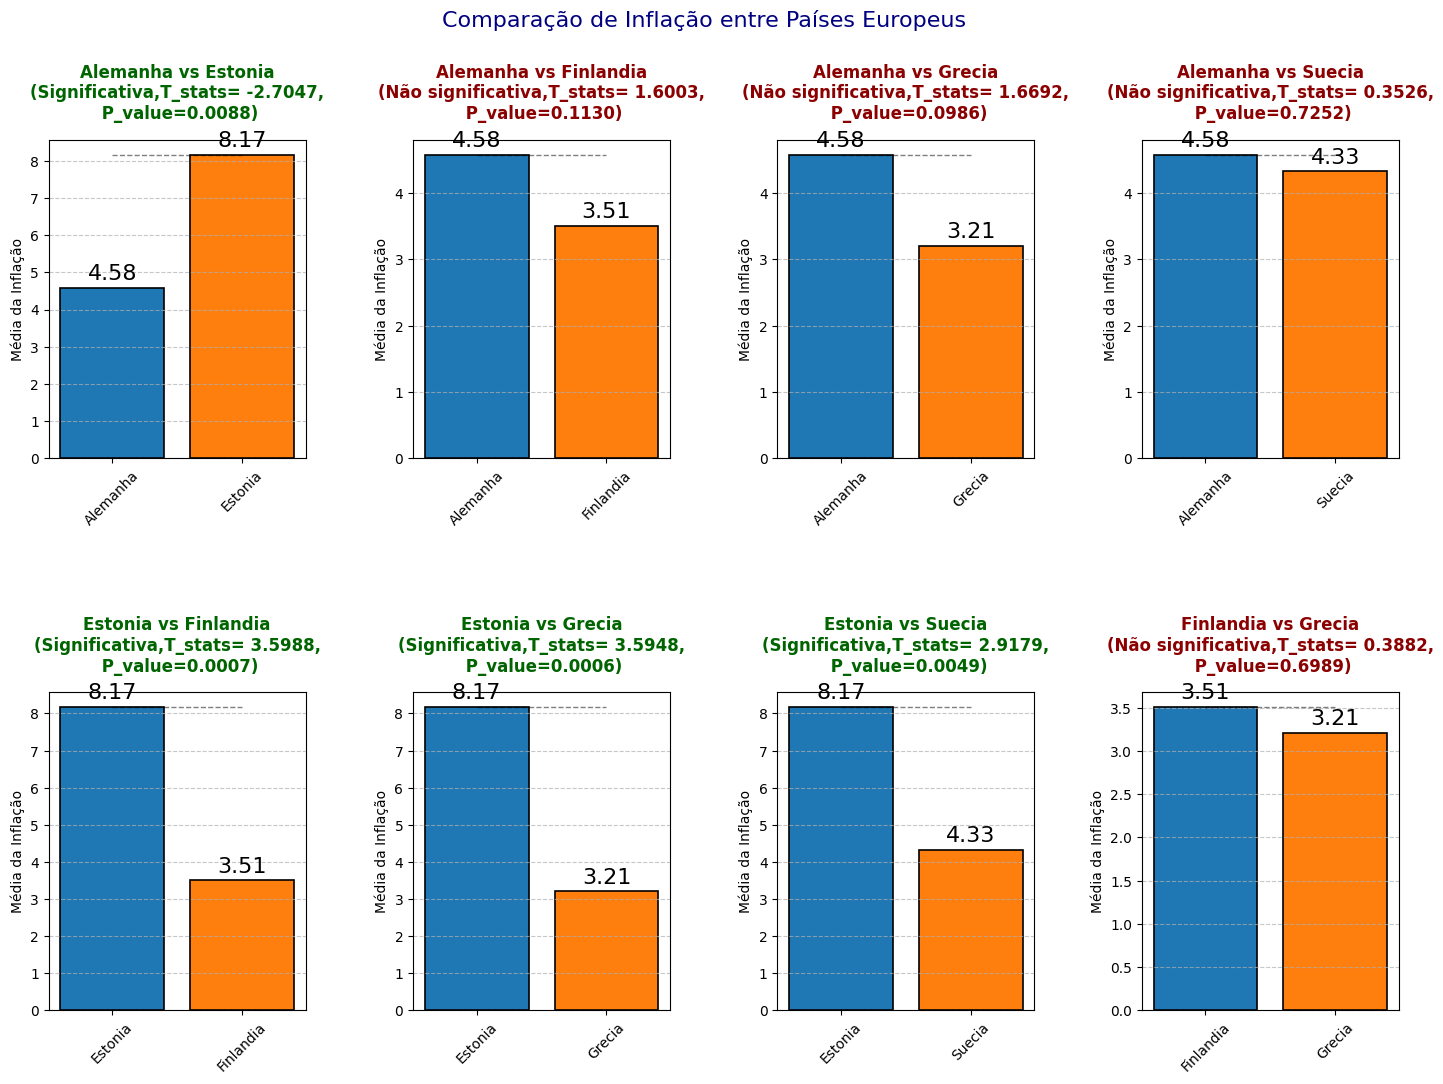

In [ ]:
niv_confianca = 0.05
cores = ['#1f77b4', '#ff7f0e']  # Palette do matplotlib

# Criar figura com subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
axs = axs.flatten()

# Loop de geração dos gráficos
for i, (pais1, pais2) in enumerate(ger_pares):
    if i >= len(axs):
        break
        
    ax = axs[i]
    
    try:
        # Cálculo das estatísticas
        dados1 = df[pais1].dropna()
        dados2 = df[pais2].dropna()
        
        # Teste t de Welch
        t_stat, p_valor = sp.stats.ttest_ind(dados1, dados2, equal_var=False)
        
        # Cálculo das médias
        media1 = dados1.mean()
        media2 = dados2.mean()
      
        
        # Formatação condicional
        diferenca = "Significativa" if p_valor < niv_confianca else "Não significativa"
        cor_titulo = 'darkgreen' if p_valor < niv_confianca else 'darkred'
        
        # Plotagem das barras
        bars = ax.bar([pais1, pais2], [media1, media2], 
                      color=cores, edgecolor='black', linewidth=1.2)
        
        # Adição dos valores nas barras
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0, 3),  # Offset vertical
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=16, color='black')
        
        # Customização do subplot
        ax.set_title(f'{pais1} vs {pais2}\n({diferenca},T_stats= {t_stat:.4f},\n P_value={p_valor:.4f})',pad=15, color=cor_titulo, fontweight='bold')
        ax.set_ylabel('Média da Inflação', fontsize=10)
        ax.tick_params(axis='x', rotation=45, labelsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Linha de referência entre as barras
        ax.plot([0, 1], [max(media1, media2)]*2, 'k--', lw=1, alpha=0.8)
        
    except Exception as e:
        print(f"Erro no par {pais1}-{pais2}: {str(e)}")
        ax.set_visible(False)  # Esconde subplots vazios

# Ajustes finais
plt.tight_layout(pad=4.0)
plt.subplots_adjust(top=0.99)
fig.suptitle('Comparação de Inflação entre Países Europeus', 
            fontsize=16, y=1.12, color='navy')
plt.show()
